# Ex4: ANOVA

## Câu 1: Kiểm tra xe 
#### Xem xét bài toán sau: Giả sử sở giao thông công chánh muốn kiểm tra sự an toàn của xe con, xe hạng trung và xe cỡ lớn. Thu thập một mẫu ba cho mỗi loại ô tô. Có sự khác biệt đáng kể giữa các loại xe không. Sử dụng α = 5%.

|---|Compact_cars|Midsize_cars|Full_size_cars |
|---|---|---|---|
|0|643|469|484|
|1|655|427|456|
|1|702|525|402|

1. Tạo dataframe như hình trên
2. Vẽ boxplot, quan sát kết quả
3. Áp dụng ANOVA để tìm xem có sự khác biệt đáng kể giữa 3 loại xe. Sử dụng alpha = 5%

In [ ]:
df = pd.DataFrame({"Compact_cars": [643,655,702],
                   "Midsize_cars": [469, 427, 525], 
                   "Full_size_cars": [484, 456, 402]})
df

## Câu 2: 
#### Xem xét bài toán sau
1. Cho tập tin data.xlsx. Đọc dữ liệu
2. Từ dữ liệu có 2 yếu tố Factor Detergent - chất tẩy rửa (super, best), Factor Temperature - nhiệt độ (hot, warm, cold). 
3. Sử dụng ANOVA hai chiều, đồng thời đánh giá chất tẩy rửa và nhiệt độ ảnh hưởng đến lượng chất bẩn bị loại bỏ. Kiểm tra ba giả thuyết

    1) ảnh hưởng của chất tẩy đến lượng chất bẩn bị loại bỏ 
    
    2) ảnh hưởng của nhiệt độ đến lượng chất bẩn bị loại bỏ và
    
    3) ảnh hưởng của chất tẩy rửa và nhiệt độ đến lượng chất bẩn bị loại bỏ.
##### Quan tâm đến việc kiểm tra các giả thiết Null Hypothesis:
    - H0D: Lượng bụi bẩn bị loại bỏ không phụ thuộc vào loại chất tẩy
    - H0T: Lượng bụi bẩn bị loại bỏ không phụ thuộc vào nhiệt độ
##### Tham khảo http://statweb.stanford.edu/~susan/courses/s141/exanova.pdf

In [12]:
data = pd.read_excel("data/data.xlsx")
data

,type,cold,warm,hot
0,super,4,7,10
1,super,5,9,12
2,super,6,8,11
3,super,5,12,9
4,best,6,13,12
5,best,6,15,13
6,best,4,12,10
7,best,4,12,13


In [13]:
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. 
# Compare d and d_melt tables for detail understanding 
d_melt = pd.melt(data, id_vars=['type'], value_vars=['cold', 'warm', 'hot'])
# replace column names
d_melt.columns = ['type', 'temperature', 'value']
d_melt

,type,temperature,value
0,super,cold,4
1,super,cold,5
2,super,cold,6
3,super,cold,5
4,best,cold,6
5,best,cold,6
6,best,cold,4
7,best,cold,4
8,super,warm,7
9,super,warm,9


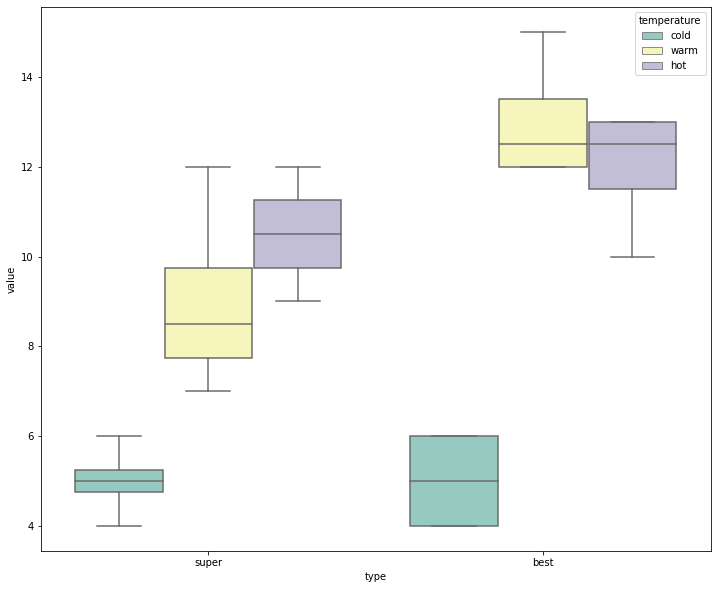

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.boxplot(x="type", y="value", hue="temperature", data=d_melt, palette="Set3") 
plt.show()

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
model = ols('value ~ C(type) + C(temperature) + C(type):C(temperature)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(type),20.166667,1.0,9.810811,5.758440e-03
C(temperature),200.333333,2.0,48.729730,5.439849e-08
C(type):C(temperature),16.333333,2.0,3.972973,3.722434e-02
Residual,37.000000,18.0,NaN,NaN


#### Bây giờ, chúng ta biết rằng sự khác biệt về chất tẩy rửa và nhiệt độ có ý nghĩa thống kê, nhưng ANOVA không cho biết chất tẩy rửa và nhiệt độ khác nhau đáng kể với nhau. Để biết các cặp chất tẩy rửa và nhiệt độ khác nhau đáng kể, thực hiện nhiều phân tích so sánh cặp bằng cách sử dụng Tukey HSD test.

In [17]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['type'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  best  super  -1.8333 0.1996 -4.7083 1.0416  False
---------------------------------------------------


In [18]:
import scipy.stats as stats
w, pvalue = stats.levene(data['hot'], data['warm'], data['cold'])
print(w, pvalue)

2.015151515151515 0.15827359485276266


In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
for name, grouped_df in d_melt.groupby('type'):
    print('type: {}'.format(name), pairwise_tukeyhsd(grouped_df['value'], grouped_df['temperature'], alpha=0.05))

type: best Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  cold    hot      7.0  0.001  4.3699  9.6301   True
  cold   warm      8.0  0.001  5.3699 10.6301   True
   hot   warm      1.0 0.5595 -1.6301  3.6301  False
----------------------------------------------------
type: super Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  cold    hot      5.5 0.0017  2.4868 8.5132   True
  cold   warm      4.0 0.0122  0.9868 7.0132   True
   hot   warm     -1.5 0.3871 -4.5132 1.5132  False
---------------------------------------------------


In [20]:
for name, grouped_df in d_melt.groupby('temperature'):
    print('temperature: {}'.format(name), pairwise_tukeyhsd(grouped_df['value'], grouped_df['type'], alpha=0.05))

temperature: cold Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  best  super      0.0   0.9 -1.7302 1.7302  False
--------------------------------------------------
temperature: hot Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  best  super     -1.5 0.1682 -3.8427 0.8427  False
---------------------------------------------------
temperature: warm Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  best  super     -4.0 0.0212 -7.1589 -0.8411   True
----------------------------------------------------
